In [1]:
# loading libraries
import numpy as np
import os, sys
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime

import itertools
import torch
from PIL import Image
from sklearn.metrics import confusion_matrix

import torchvision
import warnings
from tqdm import tqdm
import torchvision.models as models
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
from torch.optim import lr_scheduler 
import torch.nn.functional as F  # All functions that don't have any parameters
from torch.utils.data import DataLoader  # Gives easier dataset managment and creates mini batches
import torchvision.datasets as datasets  # Has standard datasets we can import in a nice way
import torchvision.transforms as transforms  # Transformations we can perform on our dataset

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"using device: {device}")

using device: cuda:0


In [2]:
# repo imports
from FlowNetPytorch.models.FlowNetS import flownets_bn
from FlowNetPytorch.util import flow2rgb

c:\Users\20182475\OneDrive - TU Eindhoven\TUe documents\BAU3\Honors - Smart Mobility\deeplearning-notebooks\Optical Flow\FlowNetPytorch\models\util.py:10: ImportWarning: failed to load custom correlation modulewhich is needed for FlowNetC
  warnings.warn("failed to load custom correlation module"


In [13]:
model = flownets_bn()

In [14]:
image1 = torch.zeros(1,3,100,100)
image1[:,:,40:60,30:50] = 1
image2 = torch.zeros(1,3,100,100)
image2[:,:,40:60,50:70] = 1
image = torch.cat((image1, image2), 1)
print(image.size())

torch.Size([1, 6, 100, 100])


In [15]:
out = model(image)


In [16]:
print(out.shape)

torch.Size([1, 2, 25, 25])


In [17]:
rgb = flow2rgb(flow_map = out.squeeze(0), max_value = torch.max(out).item())

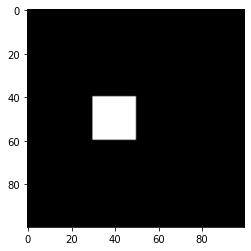

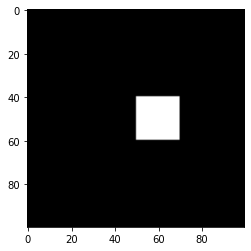

In [18]:
image1_ = image1.squeeze(0).permute(1,2,0)
image2_ = image2.squeeze(0).permute(1,2,0)
plt.figure()
plt.imshow(image1_)
plt.figure()
plt.imshow(image2_)

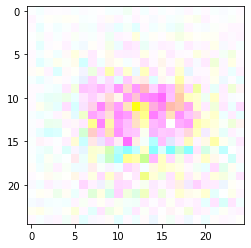

In [19]:
plt.imshow(rgb.transpose(1,2,0))

In [32]:
x_vec = out[:,0,:,:].squeeze(0)
y_vec = out[:,1,:,:].squeeze(0)

print(f"mean of vectors in x-direction: {torch.mean(x_vec)}")
print(f"mean of vectors in y-direction: {torch.mean(y_vec)}")

mean of vectors in x-direction: 0.3706480860710144
mean of vectors in y-direction: 0.007226495537906885
